In [1]:
import tensorflow as tf
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2024-04-27 15:22:25.562789: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 15:22:26.980031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


In [2]:
from cnn import LFV_CNN

In [3]:
# get track df (all songs in the fma_small music) and 
# million_song_df (all songs in triplet and million_song database)
## Important because we only have ground truths for songs in million_song db
# matched_tracks df which has track_id (triple name) and index_into_fma_track_df
%run fma_exploration.ipynb

Loading data from ../Datasets/million_song_data.csv
found 115 songs
             track_id     track_title artist_name_x  play_count  \
0  SOYHHHT12A6D4F7F97  one more night  phil collins    0.823479   
1  SOLXDDC12A6701FBFD         im back        eminem    0.811708   
2  SOEHTZE12A6310F0F2      one i love      coldplay    0.810264   
3  SOWPAXV12A67ADA046         push it     saltnpepa    0.806120   
4  SOUCKDH12A8C138FF5      dont panic      coldplay    0.781932   

   index_into_fma_track_df  artist_name_y  
0                    32589    mild winter  
1                   134415    audiobinger  
2                    13976  the volebeats  
3                    93052       metalleg  
4                    71980        nisei23  
Number of matched tracks: 40


Loading data from ../Datasets/million_song_data.csv
found 115 songs
             track_id     track_title artist_name_x  play_count  \
0  SOYHHHT12A6D4F7F97  one more night  phil collins    0.823479   
1  SOLXDDC12A6701FBFD         im back        eminem    0.811708   
2  SOEHTZE12A6310F0F2      one i love      coldplay    0.810264   
3  SOWPAXV12A67ADA046         push it     saltnpepa    0.806120   
4  SOUCKDH12A8C138FF5      dont panic      coldplay    0.781932   

   index_into_fma_track_df  artist_name_y  
0                    32589    mild winter  
1                   134415    audiobinger  
2                    13976  the volebeats  
3                    93052       metalleg  
4                    71980        nisei23  
Number of matched tracks: 40
[101116, 101893, 101119, 101112, 101868, 101951, 101873, 101111, 101118, 101864, 140923, 140935, 140258, 140872, 140266, 140790, 140565, 140925, 140933, 140934, 140566, 140609, 140421, 140584, 140922, 140794, 140576, 140583, 140625, 140

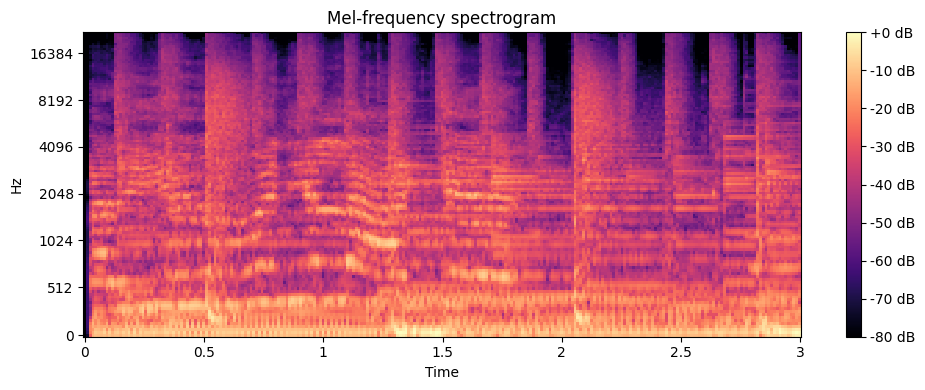

In [4]:
# 
%run audio_parsing_test.ipynb

In [5]:
CNN_Model = LFV_CNN()

/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-27 15:22:56.325460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3987 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
CNN_Model.train(create_mel_spectrogram(find_fma_song(98622), duration=3), np.random.randint(100, size=50))